Tracking element #1 (s = 0.0 m, -0.6 nC, 1.0 GeV, SourceBasic, stage 0)
Tracking element #2 (s = 0.3 m, -0.6 nC, 2.5 GeV, StageNonlinear1D, stage 1)
Tracking element #3 (s = 2.2 m, -0.6 nC, 2.5 GeV, InterstageELEGANT, stage 1)
Tracking element #4 (s = 2.5 m, -0.6 nC, 4.0 GeV, StageNonlinear1D, stage 2)
Tracking element #5 (s = 4.9 m, -0.6 nC, 4.0 GeV, InterstageELEGANT, stage 2)
Tracking element #6 (s = 5.2 m, -0.6 nC, 5.4 GeV, StageNonlinear1D, stage 3)
Tracking element #7 (s = 8.1 m, -0.6 nC, 5.4 GeV, InterstageELEGANT, stage 3)
Tracking element #8 (s = 8.4 m, -0.5 nC, 7.0 GeV, StageNonlinear1D, stage 4)
Tracking element #9 (s = 11.6 m, -0.5 nC, 7.0 GeV, InterstageELEGANT, stage 4)
Tracking element #10 (s = 11.9 m, -0.5 nC, 8.6 GeV, StageNonlinear1D, stage 5)
Tracking element #11 (s = 15.4 m, -0.5 nC, 8.6 GeV, InterstageELEGANT, stage 5)
Tracking element #12 (s = 15.7 m, -0.5 nC, 10.1 GeV, StageNonlinear1D, stage 6)
Tracking element #13 (s = 19.6 m, -0.5 nC, 10.1 GeV, InterstageELEGA

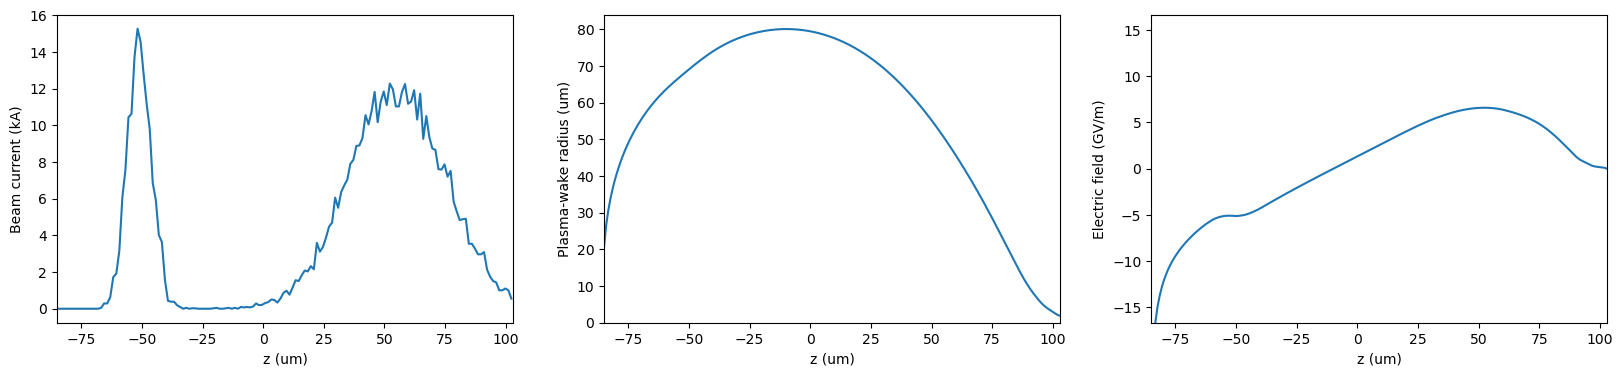

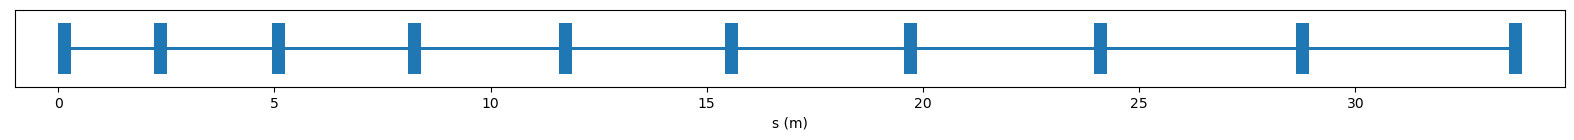

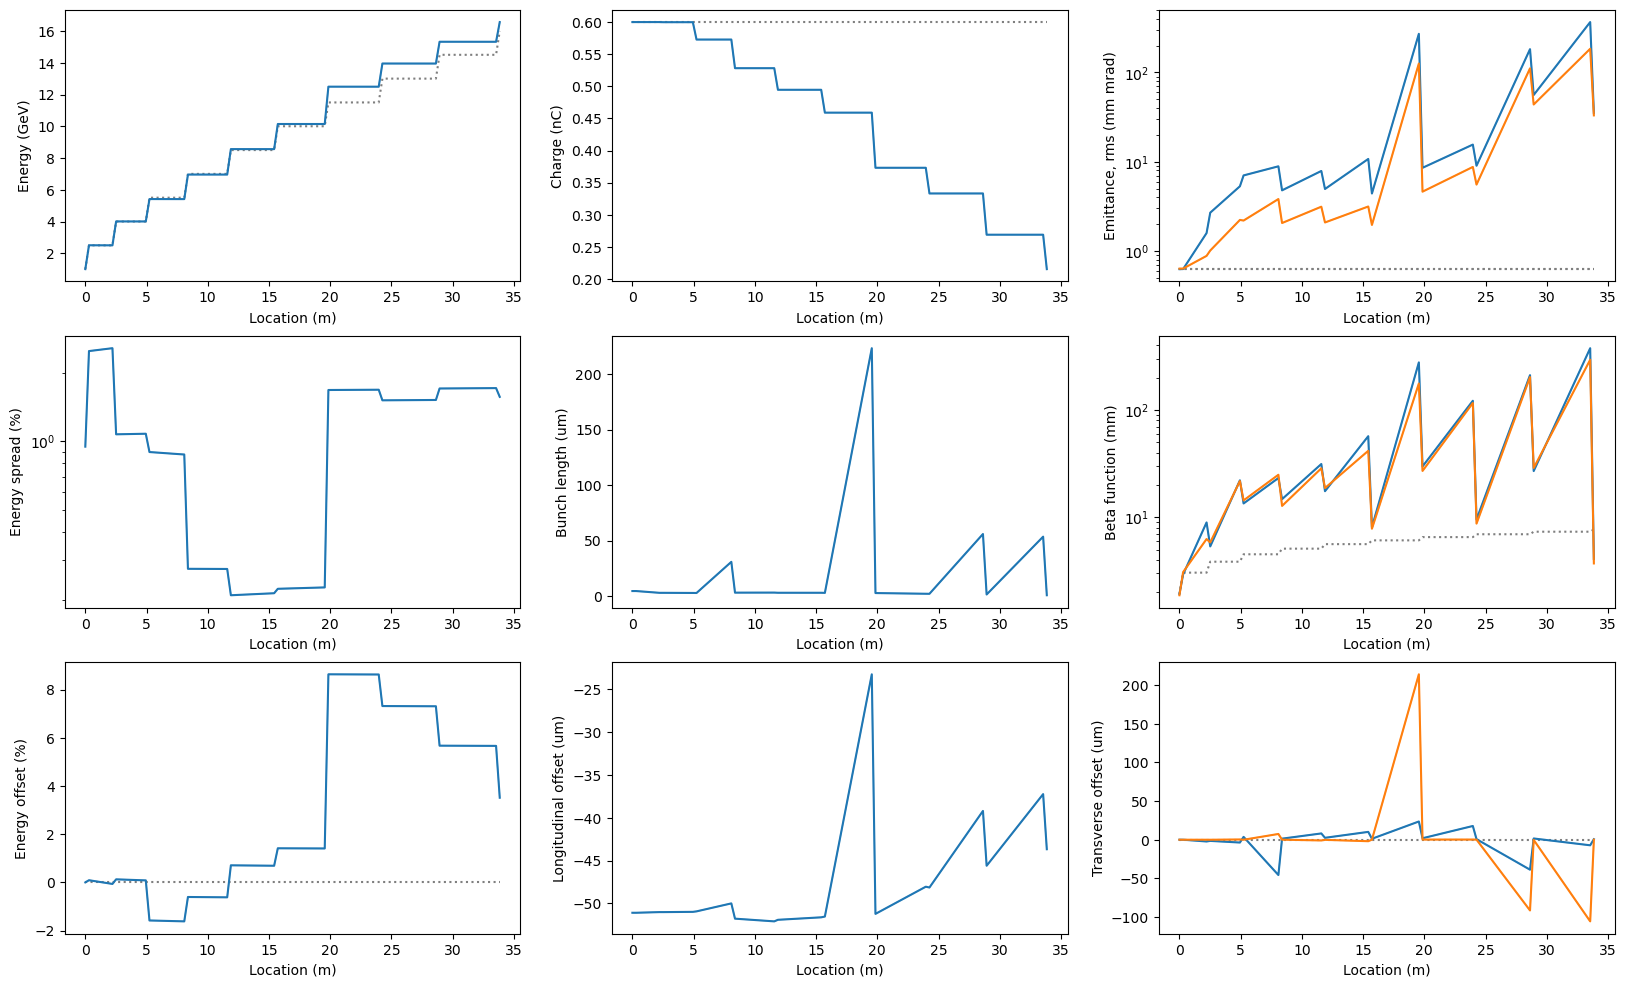

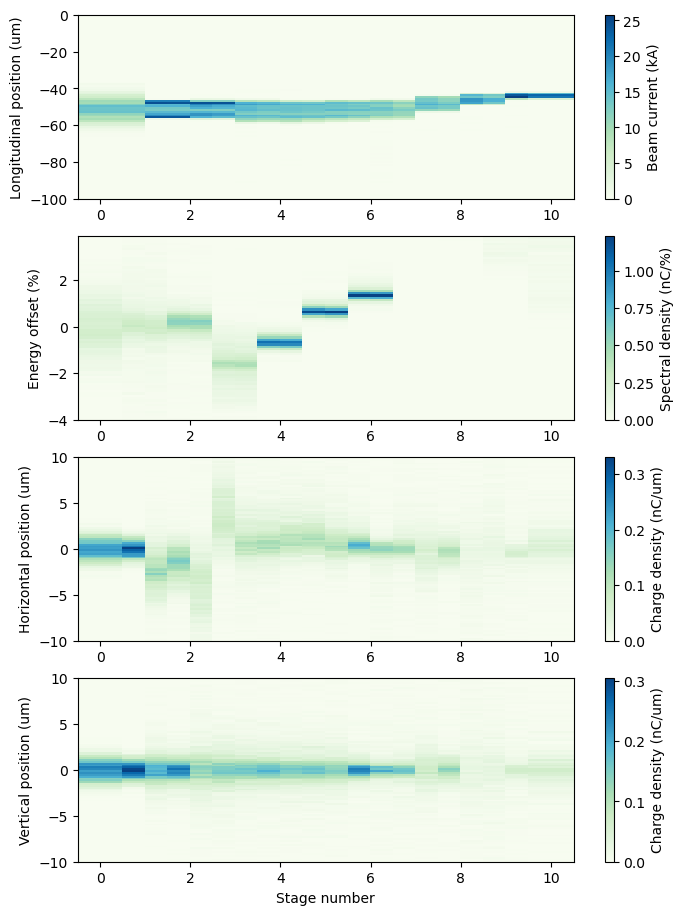

In [14]:
import sys
sys.path.append('../')
from opal import SourceBasic, StageNonlinear1D, InterstageELEGANT, Linac
from opal.utilities.plasmaphysics import beta_matched
import numpy as np

# define drive bunch
driver = SourceBasic()
driver.Q = -2e-9 # [C]
driver.E0 = 2e9 # [eV]
driver.relsigE = 0.01
driver.sigz = 20e-6 # [m]
driver.z = 55e-6 # [m]
driver.emitnx, driver.emitny = 10e-6, 10e-6 # [m rad]
driver.betax, driver.betay = 50e-3, 50e-3 # [m]
driver.Npart = 20000

# define stage
stage = StageNonlinear1D()
stage.driverSource = driver
stage.deltaE = 1.5e9 # [eV]
stage.L = 0.3 # [m]
stage.n0 = 3e22 # [m^-3]

# define beam
source = SourceBasic()
source.Q = -0.6e-9 # [C]
source.E0 = 1e9 # [eV]
source.relsigE = 0.01
source.sigz = 5e-6 # [m]
source.z = -51e-6 # [m]
source.emitnx = 1e-6 # [m rad]
source.emitny = 1e-6 # [m rad]
source.betax = beta_matched(stage.n0, source.E0) # [m]
source.betay = source.betax
source.Npart = 3000

# define interstage
interstage = InterstageELEGANT()
interstage.beta0 = lambda E: beta_matched(stage.n0, E) # [T]
interstage.Bdip = 0.5 # [T]
interstage.Ldip = lambda E: 0.8 * np.sqrt(E/10e9) # [m(eV)]

# define linac
linac = Linac(source, stage, interstage, Nstages=10)

# track particles
beam = linac.run("mars_shot", overwrite=True)

# plot survery and beam evolution
stage.plotWakefield(source.track())
stage.plotWakefield(beam)
linac.plotSurvey()
linac.plotEvolution()
linac.plotWaterfalls()